In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = '/content/drive/MyDrive/InBig_Project/박기범/data/'
KORAIL = PATH+'KORAIL/'
KT1 = PATH+'KT/(KT)플랫폼통합경진대회_전주시_시군구/'
KT2 = PATH+'KT/(KT)플랫폼통합경진대회_전주시_행정동/'
CORONA = '/content/drive/MyDrive/InBig_Project/DATA/전국_시군구별_코로나19_발생_현황정보.csv'
OUTPUT = '/content/drive/MyDrive/InBig_Project/박기범/data/전주/'

In [4]:
tourist_si_day = pd.read_csv(KT1+'(KT)플랫폼통합경진대회_전주시_시군구_1.일별관광객수.csv', parse_dates=['ETL_YMD'], encoding='euc_kr')
tourist_dong_day = pd.read_csv(KT2+'(KT)플랫폼통합경진대회_전주시_행정동_1.일별관광객수.csv', parse_dates=['ETL_YMD'], encoding='euc_kr')
corona = pd.read_csv(CORONA, parse_dates=['기준일자'])

# 코로나 데이터

In [5]:
corona = corona.sort_values(['기준일자'])
# corona = corona.set_index(['기준일자'], drop=False)
jj_corona = corona[(corona['시도명'] == '전라북도') & (corona['시군구명'] == '전주시')].drop_duplicates(['기준일자']).reset_index(drop=True)
jj_corona_2020 = jj_corona[('2020-02-29' <= jj_corona['기준일자']) & (jj_corona['기준일자'] < '2020-06')].drop_duplicates(['기준일자']).reset_index(drop=True)
jj_corona_2021 = jj_corona[('2021-02-25' <= jj_corona['기준일자']) & (jj_corona['기준일자'] < '2021-06')].drop_duplicates(['기준일자']).reset_index(drop=True)

In [6]:
jj_corona_2021.loc[73:75, '누적확진(명)'] = 678
jj_corona_2021.loc[18, '누적확진(명)'] = 418
jj_corona.loc[402:404, '누적확진(명)'] = 678
jj_corona.loc[347, '누적확진(명)'] = 418

In [7]:
jj_corona_2020['일일확진(명)'] = 0
jj_corona_2021['일일확진(명)'] = 0
jj_corona['일일확진(명)'] = 0

for i in range(1, len(jj_corona)):
  jj_corona.loc[i, '일일확진(명)'] = jj_corona.loc[i]['누적확진(명)'] - jj_corona.loc[i-1]['누적확진(명)']

for i in range(1, len(jj_corona_2020)):
  jj_corona_2020.loc[i, '일일확진(명)'] = jj_corona_2020.loc[i]['누적확진(명)'] - jj_corona_2020.loc[i-1]['누적확진(명)']

for i in range(1, len(jj_corona_2020)):
  jj_corona_2021.loc[i, '일일확진(명)'] = jj_corona_2021.loc[i]['누적확진(명)'] - jj_corona_2021.loc[i-1]['누적확진(명)']

In [8]:
jj_corona

,기준일자,시도명,시군구명,누적확진(명),누적격리(명),누적격리해제(명),누적사망(명),시군구코드(표준),시도코드(표준),일일확진(명)
0,2020-01-20,전라북도,전주시,0.0,0.0,0.0,0.0,4511.0,45.0,0.0
1,2020-01-21,전라북도,전주시,0.0,0.0,0.0,0.0,4511.0,45.0,0.0
2,2020-01-22,전라북도,전주시,0.0,0.0,0.0,0.0,4511.0,45.0,0.0
3,2020-01-23,전라북도,전주시,0.0,0.0,0.0,0.0,4511.0,45.0,0.0
4,2020-01-24,전라북도,전주시,0.0,0.0,0.0,0.0,4511.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...
467,2021-07-25,전라북도,전주시,813.0,NaN,NaN,NaN,4511.0,45.0,5.0
468,2021-07-26,전라북도,전주시,819.0,NaN,NaN,NaN,4511.0,45.0,6.0
469,2021-07-27,전라북도,전주시,825.0,NaN,NaN,NaN,4511.0,45.0,6.0
470,2021-07-28,전라북도,전주시,828.0,NaN,NaN,NaN,4511.0,45.0,3.0


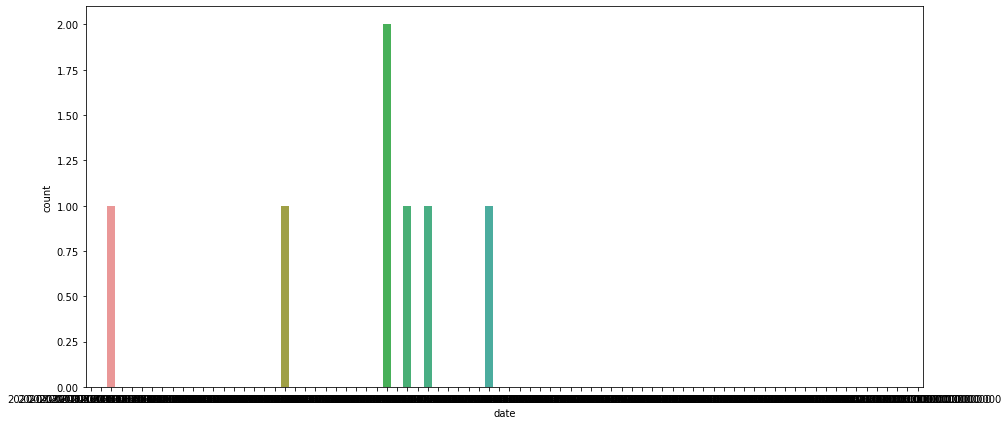

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=jj_corona_2020, x='기준일자', y='일일확진(명)')
plt.ylabel('count')
plt.xlabel('date')
plt.show()

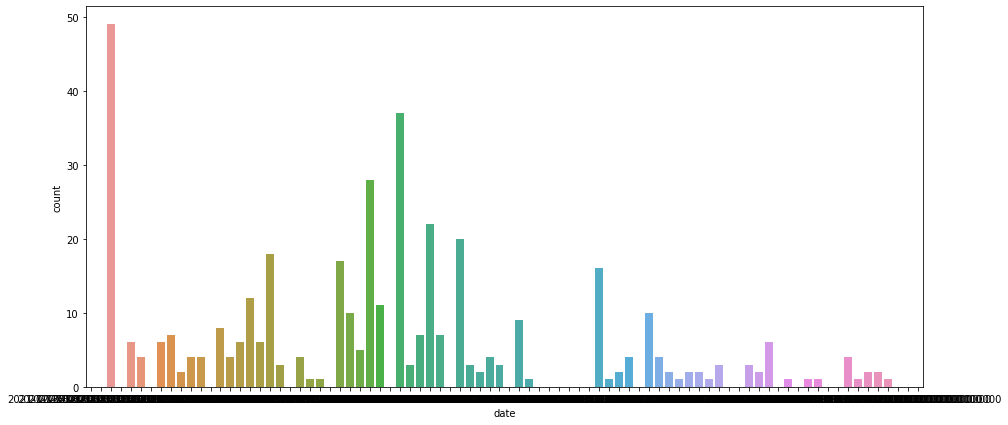

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=jj_corona_2021, x='기준일자', y='일일확진(명)')
plt.ylabel('count')
plt.xlabel('date')
plt.show()

In [ ]:
jj_corona_2020 = jj_corona_2020[(jj_corona_2020['기준일자'] >= '2020-03') & (jj_corona_2020['기준일자'] <= '2020-06')]
jj_corona_2020 = jj_corona_2020.drop(['누적확진(명)', '누적격리(명)', '누적격리해제(명)', '누적사망(명)', '시군구코드(표준)', '시도코드(표준)'], axis=1).reset_index(drop=True)

In [ ]:
jj_corona_2021 = jj_corona_2021[(jj_corona_2021['기준일자'] >= '2021-03') & (jj_corona_2021['기준일자'] <= '2021-06')]
jj_corona_2021 = jj_corona_2021.drop(['누적확진(명)', '누적격리(명)', '누적격리해제(명)', '누적사망(명)', '시군구코드(표준)', '시도코드(표준)'], axis=1).reset_index(drop=True)

In [ ]:
jj_corona_2020 = pd.concat([jj_corona_2020, jj_corona_2021])

In [ ]:
jj_corona_2020.to_csv(OUTPUT+'코로나_전주_일.csv', index=False)

In [ ]:
jj_corona = jj_corona.drop(['누적확진(명)', '누적격리(명)', '누적격리해제(명)', '누적사망(명)', '시군구코드(표준)', '시도코드(표준)'], axis=1).reset_index(drop=True)
jj_corona.to_csv(OUTPUT+'코로나_전주A_일.csv', index=False)

# 관광객 데이터

In [ ]:
tourist_si_day['O_CNT'] = tourist_si_day['O_CNT'].apply(lambda x: int(x.replace(',','')) if type(x) == str else int(x))
tourist_si_day['F_CNT'] = tourist_si_day['F_CNT'].apply(lambda x: int(x.replace(',','')) if type(x) == str else int(x))

In [ ]:
tourist_si_day['SUM'] = tourist_si_day['O_CNT'] + tourist_si_day['F_CNT']
tourist_si_day

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT,SUM
0,2019-03-01,전라북도,45,전주시,45110,"255,924",242788,726,243514
1,2019-03-02,전라북도,45,전주시,45110,"260,757",250184,666,250850
2,2019-03-03,전라북도,45,전주시,45110,"265,163",196746,589,197335
3,2019-03-04,전라북도,45,전주시,45110,"283,210",171269,585,171854
4,2019-03-05,전라북도,45,전주시,45110,"281,600",176001,673,176674
...,...,...,...,...,...,...,...,...,...
271,2021-05-27,전라북도,45,전주시,45110,"392,578",158620,32,158652
272,2021-05-28,전라북도,45,전주시,45110,"396,232",176586,29,176615
273,2021-05-29,전라북도,45,전주시,45110,"367,371",228375,24,228399
274,2021-05-30,전라북도,45,전주시,45110,"356,360",189420,41,189461


In [ ]:
tourist_si_day = tourist_si_day.drop(['SIDO_CD', 'SGG_CD', 'I_CNT'], axis=1)

In [ ]:
tourist_si_day.to_csv(OUTPUT+'관광객_전주_일.csv', index=False)

In [ ]:
tourist_si_day

,ETL_YMD,SIDO_NM,SGG_NM,O_CNT,F_CNT,SUM
0,2019-03-01,전라북도,전주시,242788,726,243514
1,2019-03-02,전라북도,전주시,250184,666,250850
2,2019-03-03,전라북도,전주시,196746,589,197335
3,2019-03-04,전라북도,전주시,171269,585,171854
4,2019-03-05,전라북도,전주시,176001,673,176674
...,...,...,...,...,...,...
271,2021-05-27,전라북도,전주시,158620,32,158652
272,2021-05-28,전라북도,전주시,176586,29,176615
273,2021-05-29,전라북도,전주시,228375,24,228399
274,2021-05-30,전라북도,전주시,189420,41,189461
